# CYO-Project
## Inventory Management

In [15]:
#Importing all needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
#CSV DATA FILE
filename = 'Datasets/Cleaned_ML_Dataset.csv'
df = pd.read_csv(filename)

In [16]:
#Testing Data for Printing
print(df.head())

      RegionName               CountryName  State       City    WarehouseName  \
0  South America  United States of America  Texas  Southlake  Southlake Texas   
1  South America  United States of America  Texas  Southlake  Southlake Texas   
2  South America  United States of America  Texas  Southlake  Southlake Texas   
3  South America  United States of America  Texas  Southlake  Southlake Texas   
4  South America  United States of America  Texas  Southlake  Southlake Texas   

  CategoryName                       ProductName  ProductStandardCost  Profit  \
0          CPU  Intel Xeon E5-2699 V3 (OEM/Tray)              2867.51  542.95   
1          CPU             Intel Xeon E5-2697 V3              2326.27  448.71   
2          CPU  Intel Xeon E5-2698 V3 (OEM/Tray)              2035.18  625.54   
3          CPU             Intel Xeon E5-2697 V4              2144.40  410.59   
4          CPU  Intel Xeon E5-2685 V3 (OEM/Tray)              2012.11  489.58   

   ProductListPrice  Custo

In [17]:
#Checking for null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RegionName           400 non-null    object 
 1   CountryName          400 non-null    object 
 2   State                400 non-null    object 
 3   City                 400 non-null    object 
 4   WarehouseName        400 non-null    object 
 5   CategoryName         400 non-null    object 
 6   ProductName          400 non-null    object 
 7   ProductStandardCost  400 non-null    float64
 8   Profit               400 non-null    float64
 9   ProductListPrice     400 non-null    float64
 10  CustomerCreditLimit  400 non-null    int64  
 11  Status               400 non-null    object 
 12  OrderDate            400 non-null    object 
 13  OrderItemQuantity    400 non-null    int64  
 14  PerUnitPrice         400 non-null    float64
 15  TotalItemQuantity    400 non-null    int

In [18]:
#Code to print all columns and describe them regardless of datatype
print(df.describe(include='all'))

            RegionName               CountryName       State             City  \
count              400                       400         400              400   
unique               5                         6           9                9   
top     North  America  United States of America  New Jersey  South Brunswick   
freq               177                       178          45               45   
mean               NaN                       NaN         NaN              NaN   
std                NaN                       NaN         NaN              NaN   
min                NaN                       NaN         NaN              NaN   
25%                NaN                       NaN         NaN              NaN   
50%                NaN                       NaN         NaN              NaN   
75%                NaN                       NaN         NaN              NaN   
max                NaN                       NaN         NaN              NaN   

       WarehouseName Catego

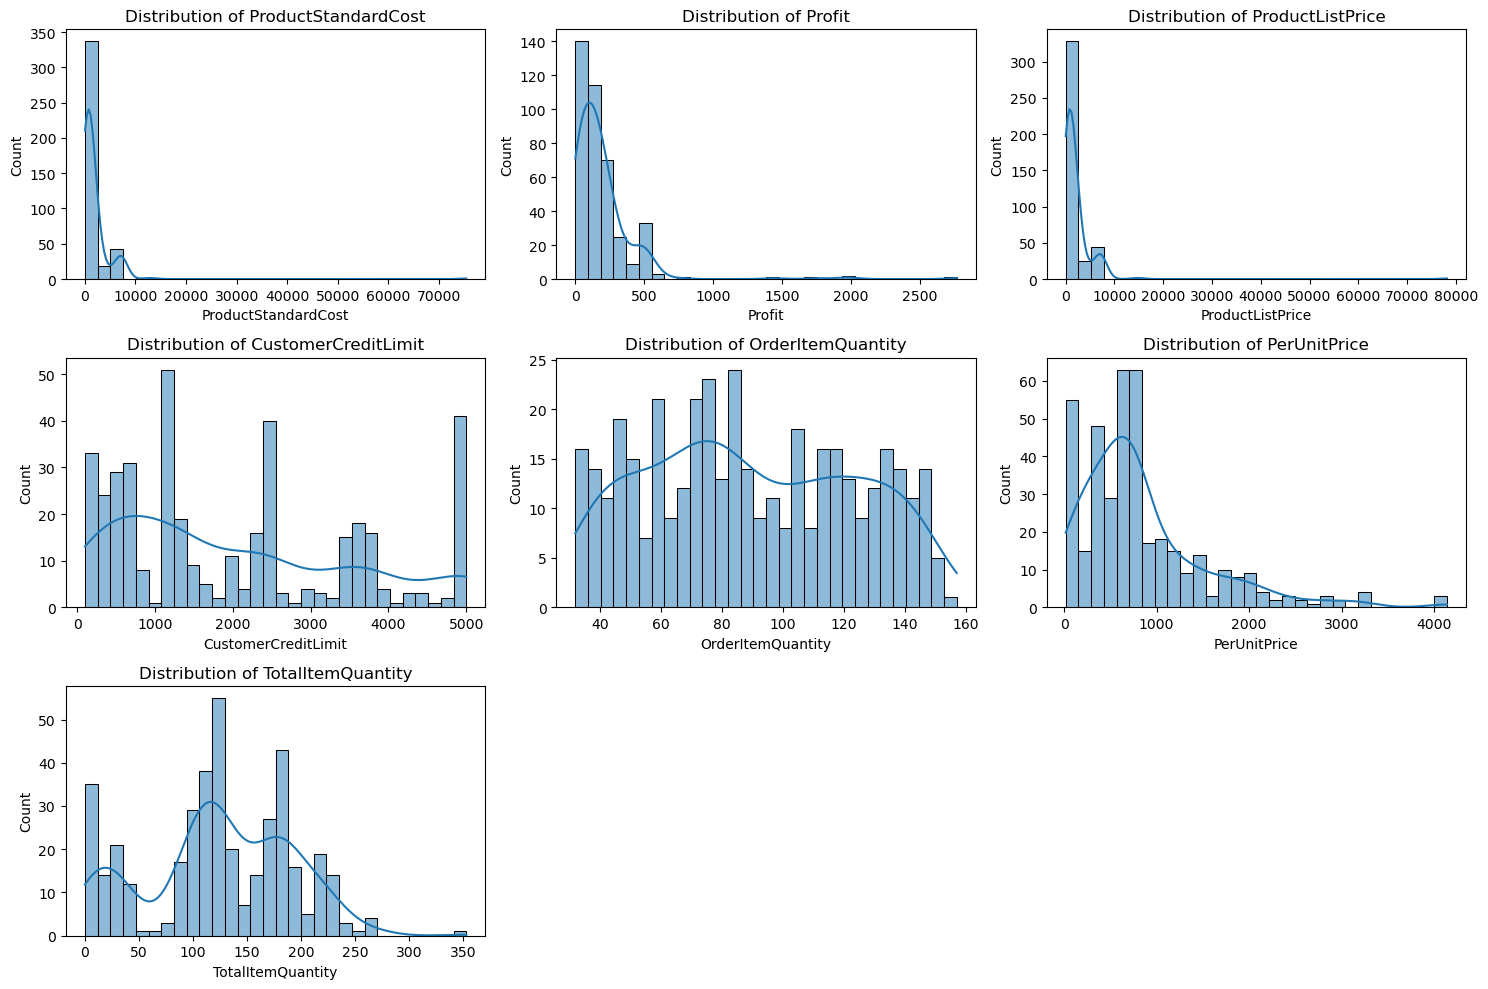

In [19]:
#This line stores only columns with float64, int64 into numerical_columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(15,10))

#This block loops through each column in numerical_columns and plots columns on a sns histogram
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

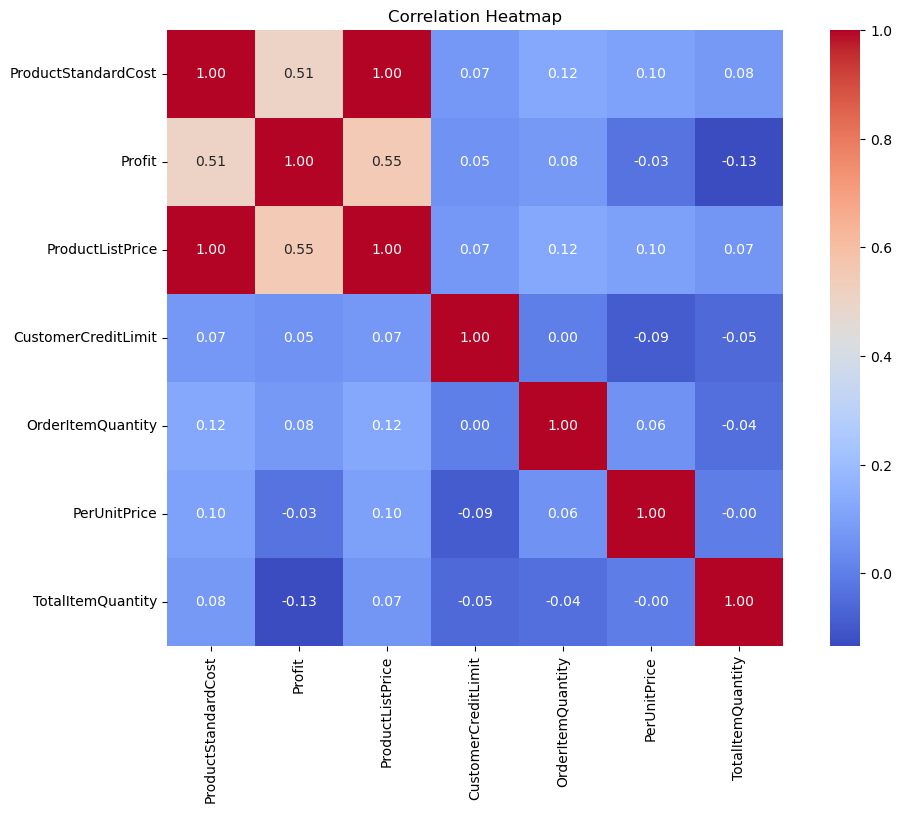

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
#Created an empty dictionary to store LabelEncoder Objects for each column
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [23]:
#Creates and instance of the StandardScaler class
scaler = StandardScaler()
# This will rescale the values to have a mean of 0 and a standard deviation of 1
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [24]:
#Removes OrderItemQuantity column from DataFrame assigned to variable X
X = df.drop('Profit', axis=1)
#Assigns OrderItemQuantity column to variable Y
Y = df['Profit']

#X,Y are feature sets
#test_size=0.2 means 20% of data will be used for testing and 80% used for training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=42)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)



(320, 15) (80, 15) (320,) (80,)


In [25]:
#Generates a Processed Dataset to Datasets Folder
df.to_csv('Datasets/Processed_Inventory_Dataset.csv', index=False)

In [26]:
#Generates training and test data to TrainedData Folder
X_train.to_csv('TrainedData/X_train', index=False)
X_test.to_csv('TrainedData/X_test', index=False)
Y_train.to_csv('TrainedData/Y_train', index=False)
Y_test.to_csv('TrainedData/Y_test', index=False)


In [27]:
#A Random Forest Regressor model used for prediction
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = model.predict(X_test)
print(Y_pred)

#Measures proprotion of variance in Profit (Higher is better)
print("R² Score:", r2_score(Y_test, Y_pred))

#Measures average difference between predicted and actual values (Lower is better)
print("MSE:", mean_squared_error(Y_test, Y_pred))


[-0.46053285 -0.64250828  0.31936871 -0.48244932 -0.23446425  0.90405867
  0.36638117 -0.21523438 -0.73636154  0.29375226  0.70312424 -0.51711811
 -0.20107773  0.89211933  0.10072017 -0.00428699 -0.71232697 -0.47123518
 -0.48148161  0.86237966  1.0321252   0.59065175  0.17940378 -0.74324065
  1.01623431 -0.13385471 -0.21193754 -0.55997389 -0.73717768 -0.28682629
 -0.15209954 -0.42698138 -0.74702017 -0.20011041 -0.48143515 -0.0204771
 -0.07087301 -0.74702017 -0.2142651  -0.10602802  0.75696029 -0.17431246
  1.02568585  0.39334605  0.86853318  0.74016468 -0.19696121 -0.39942398
  0.61816072 -0.15338221 -0.11858428  0.69188766  0.45680727  0.78620942
 -0.55027588  0.12818426 -0.58815569 -0.23896935  0.7372261  -0.13072165
  0.33248127  0.32931041 -0.74702017  0.83155456 -0.22449892  0.41655543
 -0.73717768 -0.73946114 -0.13647084  0.90170316  0.63430319 -0.10304378
  0.56625615 -0.13679604  0.67601999 -0.67814636 -0.49607447 -0.56601324
 -0.15938495 -0.66922513]
R² Score: 0.56014011373586

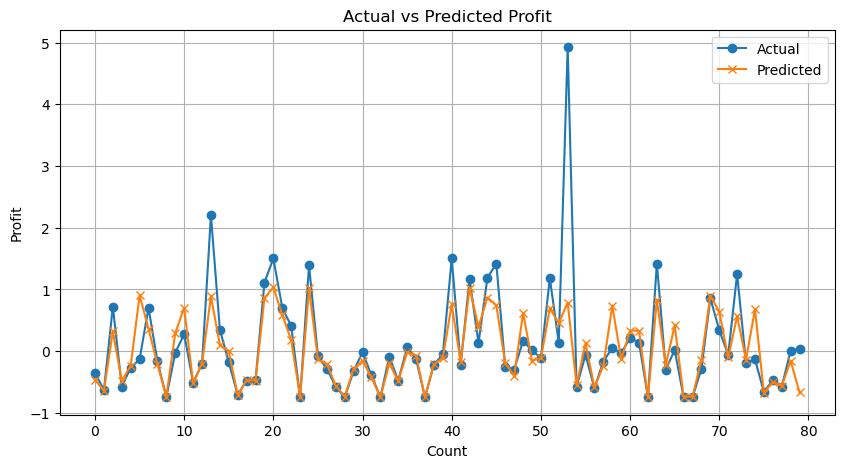

In [28]:
#Generates prediction graph
plt.figure(figsize=(10, 5))
plt.plot(range(len(Y_test)), Y_test, label="Actual", marker='o')
plt.plot(range(len(Y_pred)), Y_pred, label="Predicted", marker='x')
plt.title("Actual vs Predicted Profit")
plt.xlabel("Count")
plt.ylabel("Profit")
plt.legend()
plt.grid(True)
plt.show()
